# Simpyサンプル

*@160428 riki*

可視化コード追加ばーじょん

---

### 1. 可視化ライブラリをimport

* matplotlib
* seaborn

In [1]:
import simpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

c:\python34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### 2. plot用に、時刻とデバイス名を記録しておくリストを追加

* time(時刻を記録)
* name_of_device(デバイスの名前を記録。senderA=3, senderB=2, receiver=1とした。)

In [2]:
time = []
name_of_device = []

### 3. sender, receiverを定義

In [3]:
def senderA(env, queue, waittime, name='A'):
    while True:
        yield env.timeout(waittime)
        queue.put((name, env.now))
        time.append(env.now)
        name_of_device.append(3)

In [4]:
def senderB(env, queue, waittime, name='B'):
    while True:
        yield env.timeout(waittime)
        queue.put((name, env.now))
        time.append(env.now)
        name_of_device.append(2)

In [5]:
def receiver(env, queue):
    while True:
        sender_name, sendtime = yield queue.get()
        time.append(env.now)
        name_of_device.append(1)
        yield env.timeout(2)
        latency = env.now - sendtime
        print('%s send at %d, receive at %d, latency= %d'%(sender_name, sendtime, env.now, latency))

### 4. schedularを作成して、simulationを開始

In [6]:
env = simpy.Environment()

In [7]:
queue = simpy.Store(env)

In [8]:
env.process(senderA(env, queue, 3 ))
env.process(senderB(env, queue, 5 ))
env.process(receiver(env,queue))

<Process(receiver) object at 0x81e4e90>

In [9]:
env.run(until=30)

A send at 3, receive at 5, latency= 2
B send at 5, receive at 7, latency= 2
A send at 6, receive at 9, latency= 3
A send at 9, receive at 11, latency= 2
B send at 10, receive at 13, latency= 3
A send at 12, receive at 15, latency= 3
B send at 15, receive at 17, latency= 2
A send at 15, receive at 19, latency= 4
A send at 18, receive at 21, latency= 3
B send at 20, receive at 23, latency= 3
A send at 21, receive at 25, latency= 4
A send at 24, receive at 27, latency= 3
B send at 25, receive at 29, latency= 4


### 5.各送信機のputした時刻と、受信機のgetした時刻をプロット

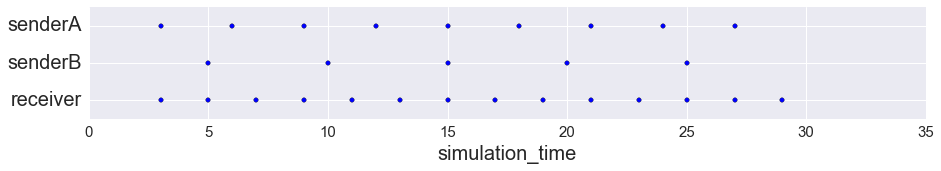

In [10]:
plt.figure(figsize=(15,2))
plt.scatter(time,name_of_device,s=20)
plt.xlabel('simulation_time',size=20)
plt.xticks(size=15)
plt.yticks([1,2,3],['receiver','senderB','senderA'],size=20);

## コメント

receiverは受信処理するのに2秒かかるから、2秒未満でqueueにpushされてもすぐに処理できないので、最大4秒の遅延時間が発生